In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Question 1
Consider the approximation to the first derivative
$$ f'(a) \approx  \frac{f(a+h) - f(a )}{h}.$$
The discretization error for this formula is $O(h)$. Suppose that the absolute error in evaluating the function $f$ is bounded by machine epsilon, $\epsilon$, with
$$ \vert \hat{f}(x) - f(x) \vert \leq \epsilon, $$
where $\hat{f}(x)$ is the floating point approximation of the exact function evaluation $f(x)$. For simplicity, let us ignore the errors generated in basic arithmetic operations.   Suppose further that there is a constant $M>0$ such that $\vert f’’(x)\vert \leq M$ for all $x$.

**Ignore the floating point error in approximating $h$ with a floating point value in the denominator.**

## A. 
Show that the total computational error (truncation and rounding combined) is bounded by
$$ \frac{Mh}{2} + \frac{2\epsilon}{h}.$$ 


## B. 
Treat the above bound as an approximation of the absolute error. At what value of $h$ is the error estimate in part A minimized?


## C. 
Copy and paste Example 2 in the Week 2 Python notebook into a new notebook. Plot the error estimate derived in part A (again treating the bound as an approximation) along with the empirical computational error (the numerically computed error) and the estimate of the discretization error (both of these are already plotted in the example). Is the error estimate from part A a better error estimate? Why? Plot the minimum predicted in part B. Does it agree with the minimum of the empirical error? **For the graph, use $\epsilon = 10^{-16}$ and $M = |f''(a)|$.**

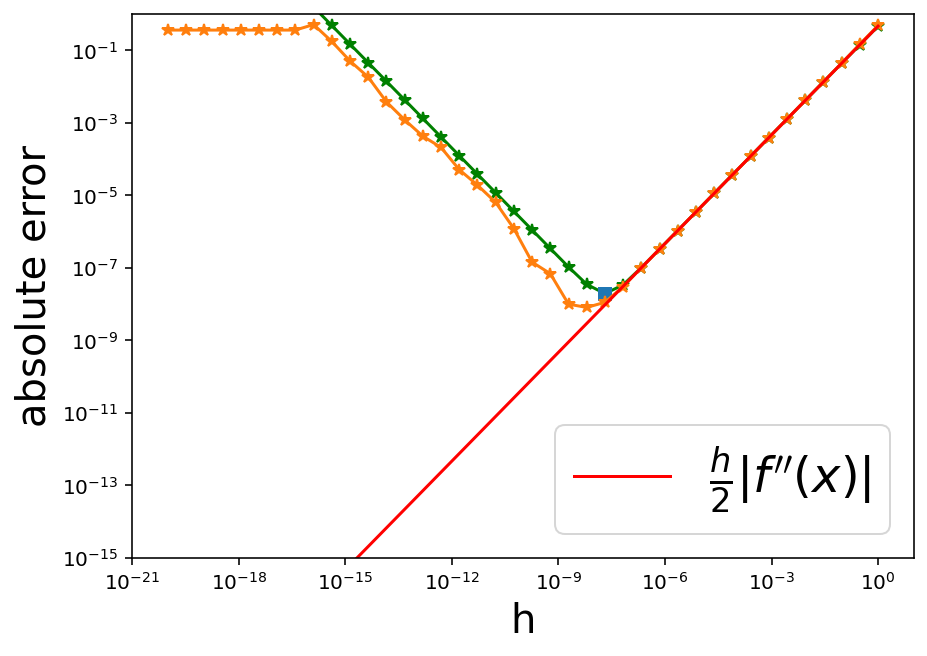

In [36]:
x0 = 1.2 
f0 = sin(x0) 
fp = cos(x0) 
fpp = -sin(x0) 
i = linspace(-20, 0, 40) 
i1=-16
i2=1/2
h = 10.0**i 
e=10.0**i1

fp_approx = (sin(x0 + h) - f0)/h 
err = absolute(fp - fp_approx) 
d_err = h/2*absolute(fpp) 
M=absolute(fpp)
comput_err=M*h/2+2*e/h
h1=(4*e/M)**i2
minimum=M*h1/2+2*e/h1

figure(1, [7, 5])
loglog(h,comput_err,'g-*')
plot(h1,minimum,'s')
loglog(h, err, '-*')
loglog(h, d_err, 'r-', label=r'$\frac{h}{2}\vert f^{\prime\prime}(x) \vert $')
xlabel('h', fontsize=20) 
ylabel('absolute error', fontsize=20) 
ylim(1e-15, 1) 
legend(fontsize=24); 

###### Question 2
Suppose we invent a new representation for finite precision real numbers based on rational numbers instead of floating point numbers. A rational number is simply the ratio of two integers, and we know how to represent integers on a computer. Rational numbers are dense on the reals, and we can approximate any real number to any desired precision with a rational number. Hence, our data structure is simply two integers, one for the numerator and one for the denominator. For this to work, our data structure must use only integers and arithmetic operations ($+,-,*$) on integers. 

Let $x = I_1 / I_2$ where $I_1$ and $I_2$ are 16bit integers. Assume for simplicity that $0 \leq I_1 \leq I_{\rm max}$ and $0 < I_2 \leq I_{\rm max}$. Hence, each real number represented in finite precision with our new system uses 32bits to store in memory.

## A
There is no point in creating a data structure for finite precision real numbers if we cannot do arithmetic operations with a computer. Devise formulas to perform addition, multiplication, and division that use only arithmetic operations on integers (only `+`, `-`, `*`). Arithmetic operations should take as input two numbers in our format and return a single new number also in our format. For example, if $x_1 = I_{11}/I_{21}$ and $x_2 = I_{12}/I_{22}$, then $x_1 + x_2 = x_3$, where $x_3$ is expressed as the ratio of two integers. For each operation, you need to write $x_3$ as the ratio of two integers each of which are functions of the integers $I_{11},I_{21}, I_{12}, I_{22}$.

## B
What is $I_{max}$ for a non negative 16bit integer?

## C
What is the smallest possible nonzero value that can be represented by our numbers (remember that we are assuming they are non negative)?

## D 
What is the largest possible value that can be represented by our numbers?

## E
What is the smallest (in absolute value) possible absolute difference between two numbers $x_1$ and $x_2$ such that $x_1 \neq x_2$? 

## F
What is the smallest (in absolute value) possible relative difference between two numbers $x_1$ and $x_2$ such that $x_1 \neq x_2$? Use the following for relative difference $$\frac{|x_1 - x_2| }{ \max(x_1, x_2)}$$

## G 
How do the above answers compare to 32bit floating point numbers? Is this a good way to represent real numbers on a computer? Why or why not?